In [1]:
# Gradient Boosting Machines
# Gradient Boosting is a popular boosting algorithm in machine learning used for classification and regression tasks. 
# Boosting is one kind of ensemble Learning method which trains the model sequentially and each new model tries to correct 
# the previous model. It combines several weak learners into strong learners. There is two most popular boosting algorithm 


# Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, 
# in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the
# previous model using gradient descent. In each iteration, the algorithm computes the gradient of the loss function
# with respect to the predictions of the current ensemble and then trains a new weak model to minimize this gradient.
# The predictions of the new model are then added to the ensemble, and the process is repeated until a stopping criterion
# is met.

# In contrast to AdaBoost, the weights of the training instances are not tweaked, instead, each predictor is trained using 
# the residual errors of the predecessor as labels. There is a technique called the Gradient Boosted Trees 
# whose base learner is CART (Classification and Regression Trees). The below diagram explains how gradient-boosted trees
# are trained for regression problems.

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings

from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("C:/Users/Derya/Downloads/Team_Basketball.csv")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [3]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [4]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

443.56389424533745

In [5]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [6]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [7]:
gbm_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 1}

In [8]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [9]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

509.63994267967

In [10]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'The importance level of variable')

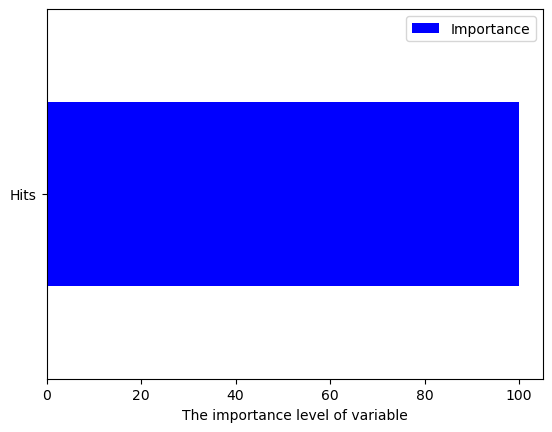

In [14]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("The importance level of variable")